In [1]:
import sys
sys.path.append('../../src')

import pickle
from tuneable_counterfactuals_explainer.explainer import Explainer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter

In [2]:
model = pickle.load(open('model/model.pkl', 'rb'))
training_data = pickle.load(open('model/training_data.pkl', 'rb'))

In [3]:
id = 2

In [4]:
scores = gaussian_filter(
    (
        training_data.iloc[id].values[:-1].astype(float).reshape(28, 28)
    )/255, 
    sigma=5
).reshape(784)
dict_scores = {x:y for x,y in zip(training_data.columns[:-1], scores) if y>0.05}

In [5]:
explainer = Explainer(
    model,
    training_data,
    'target',
    regressor='linear',
    bounding_method='minmax',
    changeability_scores=dict_scores,
    override_variable_bounds=(0, 255)
)

In [6]:
result = explainer.explain(training_data.iloc[id], additional_threshold=0.25)

  5%|▍         | 21/424 [02:10<41:42,  6.21s/it]


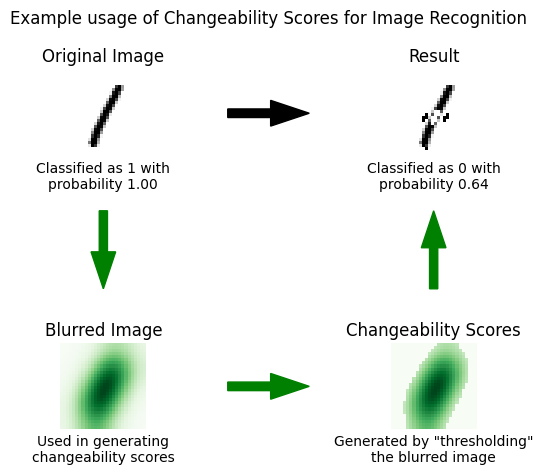

In [7]:
fig, axs = plt.subplots(3, 3)
plt.suptitle('Example usage of Changeability Scores for Image Recognition')

# Initial Image
axs[0, 0].imshow(
    np.array(training_data.iloc[id][:-1]).astype(np.float32).reshape(28, 28),
    cmap='binary'
)
axs[0, 0].set_title('Original Image')
axs[0, 0].set_xlabel(
    f'Classified as {model.predict(pd.DataFrame(training_data.iloc[id][:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(training_data.iloc[id][:-1]).T).max():.2f}'
)

# Blur Image
blurred = gaussian_filter(
    np.array(training_data.iloc[id][:-1]).astype(np.float32).reshape(28, 28)/255, 
    sigma=5
)
axs[2, 0].imshow(
    blurred,
    cmap='Greens'
)
axs[2, 0].set_title('Blurred Image')
axs[2, 0].set_xlabel(
    'Used in generating\nchangeability scores'
)

# Changeability Scores
blurred[blurred<=0.05] = 0
axs[2, 2].imshow(
    blurred,
    cmap='Greens'
)
axs[2, 2].set_title('Changeability Scores')
axs[2, 2].set_xlabel(
    'Generated by "thresholding"\nthe blurred image'
)

# Result
final = result[1].explanation_point
final[result[1].explainable_variable] = result[1].get_arg_extrema()
axs[0, 2].imshow(
    np.array(final[:-1]).astype(np.float32).reshape(28, 28),
    cmap='binary'
)
axs[0, 2].set_title('Result')
axs[0, 2].set_xlabel(
    f'Classified as {model.predict(pd.DataFrame(final[:-1]).T)[0]} with\nprobability {model.predict_proba(pd.DataFrame(final[:-1]).T).max():.2f}'
)

axs[0, 1].arrow(x=0.25, y=0.5, dx=0.5, dy=0, width=0.1, color='k')
axs[0, 1].set_ylim([0, 1])

axs[2, 1].arrow(x=0.25, y=0.5, dx=0.5, dy=0, width=0.1, color='green')
axs[2, 1].set_ylim([0, 1])

axs[1, 0].arrow(x=0.5, y=0.75, dx=0, dy=-0.5, width=0.1, color='green')
axs[1, 0].set_xlim([0, 1])

axs[1, 2].arrow(x=0.5, y=0.25, dx=0, dy=0.5, width=0.1, color='green')
axs[1, 2].set_xlim([0, 1])

for ax_t in axs:
    for ax in ax_t:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_aspect('equal')
    
plt.tight_layout()
# fig.subplots_adjust(top=1.5)
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(left=0.1)

plt.savefig('../../figures/mnist_changeability_example.eps',bbox_inches='tight')
plt.show()

In [8]:
len(dict_scores.keys())

424

In [9]:
explainer.variables

['pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel97',
 'pixel98',
 'pixel99',
 'pixel100',
 'pixel101',
 'pixel102',
 'pixel103',
 'pixel104',
 'pixel105',
 'pixel106',
 'pixel107',
 'pixel108',
 'pixel125',
 'pixel126',
 'pixel127',
 'pixel128',
 'pixel129',
 'pixel130',
 'pixel131',
 'pixel132',
 'pixel133',
 'pixel134',
 'pixel135',
 'pixel136',
 'pixel152',
 'pixel153',
 'pixel154',
 'pixel155',
 'pixel156',
 'pixel157',
 'pixel158',
 'pixel159',
 'pixel160',
 'pixel161',
 'pixel162',
 'pixel163',
 'pixel164',
 'pixel165',
 'pixel179',
 'pixel180',
 'pixel181',
 'pixel182',
 'pixel183',
 'pixel184',
 'pixel185',
 'pixel186',
 'pixel187',
 'pixel188',
 'pixel189',
 'pixel190',
 'pixel191',
 'pixel192',
 'pixel193',
 'pixel206',
 